# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Decision Trees

Another classifier, further than logistic regression model is the well known and loved [_decision tree_](https://en.wikipedia.org/wiki/Decision_tree).

### A tree as an algorithm

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning, which will be the main focus of this article.

For representing an algorithm as a tree let’s consider a very basic example that uses titanic data set for predicting whether a passenger will survive or not. Below model uses $3$ features/attributes/columns from the data set, namely `sex`, `age` and `sibsp` (number of spouses or children along).

![title](https://www.researchgate.net/profile/Joop_Hox/publication/317307818/figure/fig2/AS:633029202571264@1527937331016/Decision-tree-on-Titanic-survival-data-Source-https-en.png)

A decision tree is drawn upside down with its root at the top. In the image above, the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that does not split anymore is the decision/leaf, in this case, whether the passenger died or survived.

Although, a real dataset will have a lot more features and this will just be a branch in a much bigger tree, but you can’t ignore the simplicity of this algorithm. The feature importance is clear and relations can be viewed easily. This methodology is more commonly known as learning decision tree from data and above tree is called Classification tree as the target is to classify passenger as survived or died. Regression trees are represented in the same manner, just they predict continuous values like price of a house. In general, Decision Tree algorithms are referred to as CART or Classification and Regression Trees.

_So, what is actually going on in the background?_ Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. As a tree generally grows arbitrarily, you will need to trim it down for it to look beautiful.

There are several techniques to choose how effectively split a tree, we are going to see some of them later on, however, let's start with an example/exercise to see how a decision tree can be implemented in python.

#### Example

In this example, we will build a classifier to predict whether the fruit is Apple or Orange.

The dataset of your problem is the following,

|Texture|Weight (g)|Label|
|----|----|----|
|Smooth|130|Apple |
|Rough |155|Orange|
|Rough |180|Orange|
|Smooth|135|Apple |
|Smooth|140|Apple |
|Smooth|110|Apple |
|Rough |170|Orange|

__ML task__: make use of `scikit-learn` library to estimate wheter a _rough_ fruit weighting $160$g is an Apple or an Orange.

#### Import libraries

In [1]:
# Import libraries
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils.helpers_Garden import visualize_tree, plot_tree_interactive, randomized_tree_interactive

plt.rcParams["figure.figsize"] = (25,15) # Change the default figure size
%matplotlib inline
%config InlineBackend.figure_format = "retina"

#### Preprocessing data

We start by importing data in a dataframe.

In [2]:
# Loading the data. The first two columns contain the fruit features and the third column contains the label.
data = pd.DataFrame({'Texture': ['Smooth', 'Rough', 'Rough', 'Smooth', 'Smooth', 'Smooth', 'Rough'], 
                     'Weight': [130, 155, 180, 135, 140, 110, 170], 
                     'Fruit': ['Apple', 'Orange', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange']})

# Viewing the imported values (first 5 rows)
data.head()

,Texture,Weight,Fruit
0,Smooth,130,Apple
1,Rough,155,Orange
2,Rough,180,Orange
3,Smooth,135,Apple
4,Smooth,140,Apple


We have already seen how to treat categorical data.
Texture is a _categorical feature_, meaning it has the form of a text string, but it can be easily mapped into a set of finite integers.

In this case a smart map might be

$$
    \begin{array}{lcr}
    \text{Smooth} & \longmapsto & 0 \\
    \text{Rough}  & \longmapsto & 1
    \end{array}
$$

This map is what is called __ordinal encoder__.

In [3]:
# Implement the map as a Python function and apply it to the dataframe above
def texturemap(x):
    """
        pythonic implementation of the map described above.
        :return: 0 if the texture is 'Smooth', 1 if it is 'Rough'.
        It raises a ValueError otherwise.
    """
    
    cat1 = 'Smooth'
    cat2 = 'Rough'
    
    if x == cat1:
        return 0
    elif x == cat2:
        return 1
    else:
        raise ValueError('%s is not in the given categories' %x)

In [4]:
# The following piece of code to get the right column in the dataframe
data['texture_cat'] = data.Texture.apply(texturemap)

Now the `data` dataframe has an encoded column,

In [5]:
data

,Texture,Weight,Fruit,texture_cat
0,Smooth,130,Apple,0
1,Rough,155,Orange,1
2,Rough,180,Orange,1
3,Smooth,135,Apple,0
4,Smooth,140,Apple,0
5,Smooth,110,Apple,0
6,Rough,170,Orange,1


In [6]:
# Let's define X, y as arrays
x1 = data.texture_cat
x2 = data.Weight
y = data.Fruit

x = np.column_stack([x1, x2])

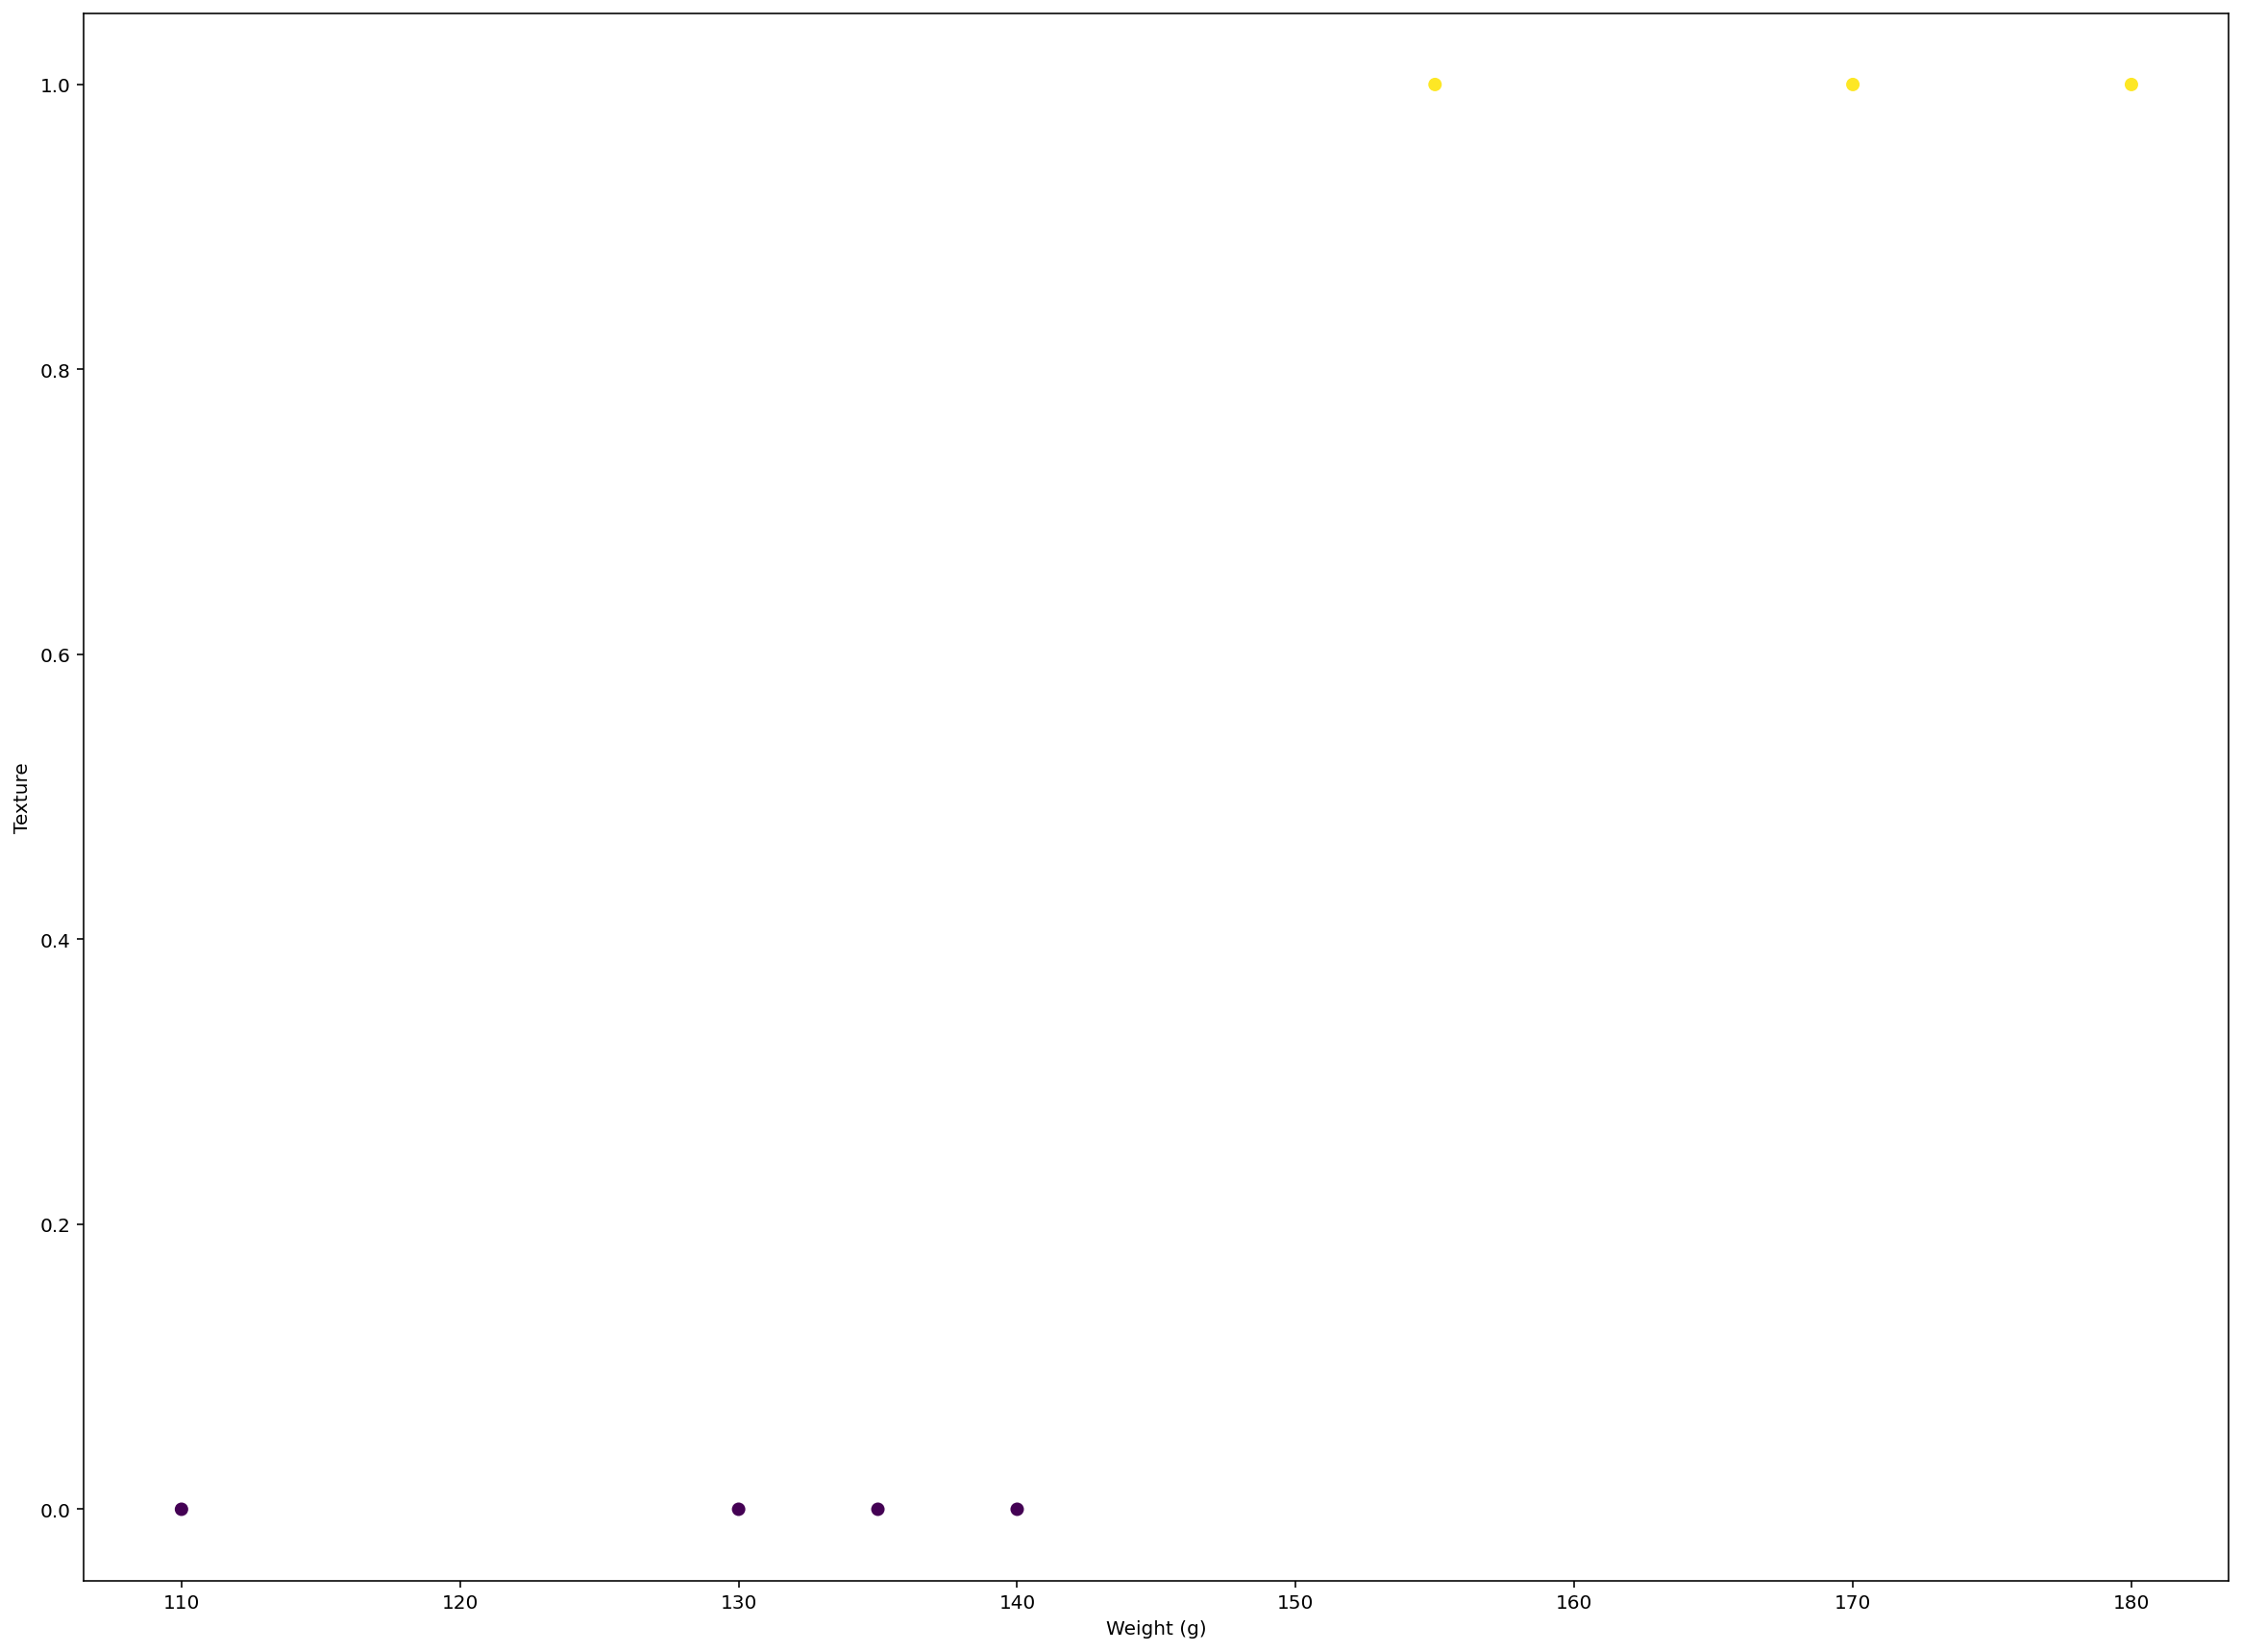

In [8]:
# Plot the data
plt.figure(figsize=(20,15))
color = (y == 'Orange') # a way to assign a different colour to our labels
plt.scatter(x[:,1], x[:,0], c = color)
plt.xlabel('Weight (g)')
plt.ylabel('Texture');

##### Quick exercise

Use logistic regression to classify oranges or apples.
In particular the test fruit is _Rough_ and $160$ g of weight.

#### Create classifier model

It is very easy to implement a classifier using `sklearn` library, we already imported `tree` containing objects we need to use decision tree.

Decision Trees (DTs) are a non-parametric supervised learning method. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In simple words, Decision tree makes the decision based on the input that was provided.

In [9]:
# Define the classifier
clf = DecisionTreeClassifier()

#### Train the model

As usual, all the machine learning classifiers in `sklearn` have the method `fit` to train the model on our data.

In [11]:
clf.fit(x, y);

#### Make predictions

We have a test fruit, _e.g._ an object which is _Rough_ and weighs $160$ g.

To extract predictions out of our model we simply call the `predict` method.

In [12]:
x_test = np.array([[1, 160]])

print('Your trained algorithm prediction is %s' %clf.predict(x_test)[0])
print('You should obtain that the test fruit is an Orange')

Your trained algorithm prediction is Orange
You should obtain that the test fruit is an Orange


We have used a decision tree without knowing anything about it. 
This is the power of libraries. `sklearn` is a great tool as you do not have to worry about technicalities since all the models are trained by a `fit` method and make predictions through the `predict` one.

However, in order to be able to face issues, make the best choices the knowledge of the model is a necessary skill the data scientist must have.
For this reason let's explore how decision tree works in some detail.

### Recursive Binary Splitting

Consider the earlier example of tree learned from [titanic dataset](https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv).

In the first split or the root, all attributes/features are considered and the training data is divided into groups based on this split. We have $3$ features, so will have $3$ candidate splits. 
Now, we will calculate how much accuracy each split will cost us, using a cost function. 
The split that costs least is chosen, which in our example is sex of the passenger. This algorithm is recursive in nature as the groups formed can be sub-divided using same strategy. Due to this procedure, this algorithm is also known as the __greedy algorithm__, as we have an excessive desire of lowering the cost. This makes the root node as best predictor/classifier.

#### Cost of a split

Let's take a closer look at cost functions used for classification and regression. 

__Regression__

$$ J(\beta) = \frac{1}{2n} \sum (h_\beta(x_i) - y_i)^2\, .$$

__Classification__

$$ J(\beta) = \frac{1}{n} \sum y_i h_\beta(x_i) + (1 - y_i) (1 - h_\beta(x_i))\, .$$

In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses. This makes sense we can be more sure that a test data input will follow a certain path.

Let's say, we are predicting the price of houses. Thus, we are in a typical _regression_ problem. 
Now the decision tree will start splitting by considering each feature in training data. The mean of responses of the training data inputs of particular group is considered as prediction for that group. 

The cost function is applied to all data points and cost is calculated for all candidate splits. Again the split with lowest cost is chosen. Another cost function involves reduction of standard deviation. 
A curious reader may find more about it [here](http://www.saedsayad.com/decision_tree_reg.htm).

#### When to stop splitting?

You might ask when to stop growing a tree? This is an excellent question!

As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. 
Such trees are _complex and can lead to overfitting_ (we will do in depth later on). So, we need to know when to stop.
One way of doing this is to set a minimum number of training inputs to use on each leaf. For instance, we can use a minimum of $10$ passengers to reach a decision (died or survived), and ignore any leaf that takes less than such a number of passengers. 
Another way is to set _maximum depth_ of your model. 
__Maximum depth__ refers to the the length of the longest path from a root to a leaf.

##### Pruning

The performance of a tree can be further increased by _pruning_. This is a technique of feature reduction and involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called reduced error pruning. More sophisticated pruning methods can be used such as cost complexity pruning where a learning parameter $\alpha$ is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as weakest link pruning.

---

#### Exercise

Use the data contained in `datasets/ionosphere_data.csv` to predict whether the vector 

```python
    x_test = [0.0, 0.0, 1.0, 0.95161, 1.0, 1.0, 0.2163, 1.0, 0.77152, -0.16399, 0.0, 0.0, 0.0, 0.0, -1.0,
              -0.34, 0.75, 0.3933, -1.0, 0.54467, -0.1321, 1.0, 0.0, 0.0, 1.0, 0.0, 0.51613, 1.0, 1.0, -0.9213,
              0.75682, 1.0, 0.32382, 1.0]
```
Corresponding to a new measure, has label $g$ (good) or $b$ (bad).

In [14]:
df_iono = pd.read_csv('datasets/ionosphere_data.csv')
df_iono.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### Working Example

Let's build a dataset and a simple decision tree built on these. 

The model will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This figure presents a visualization of the first four levels of a decision tree classifier for this data.

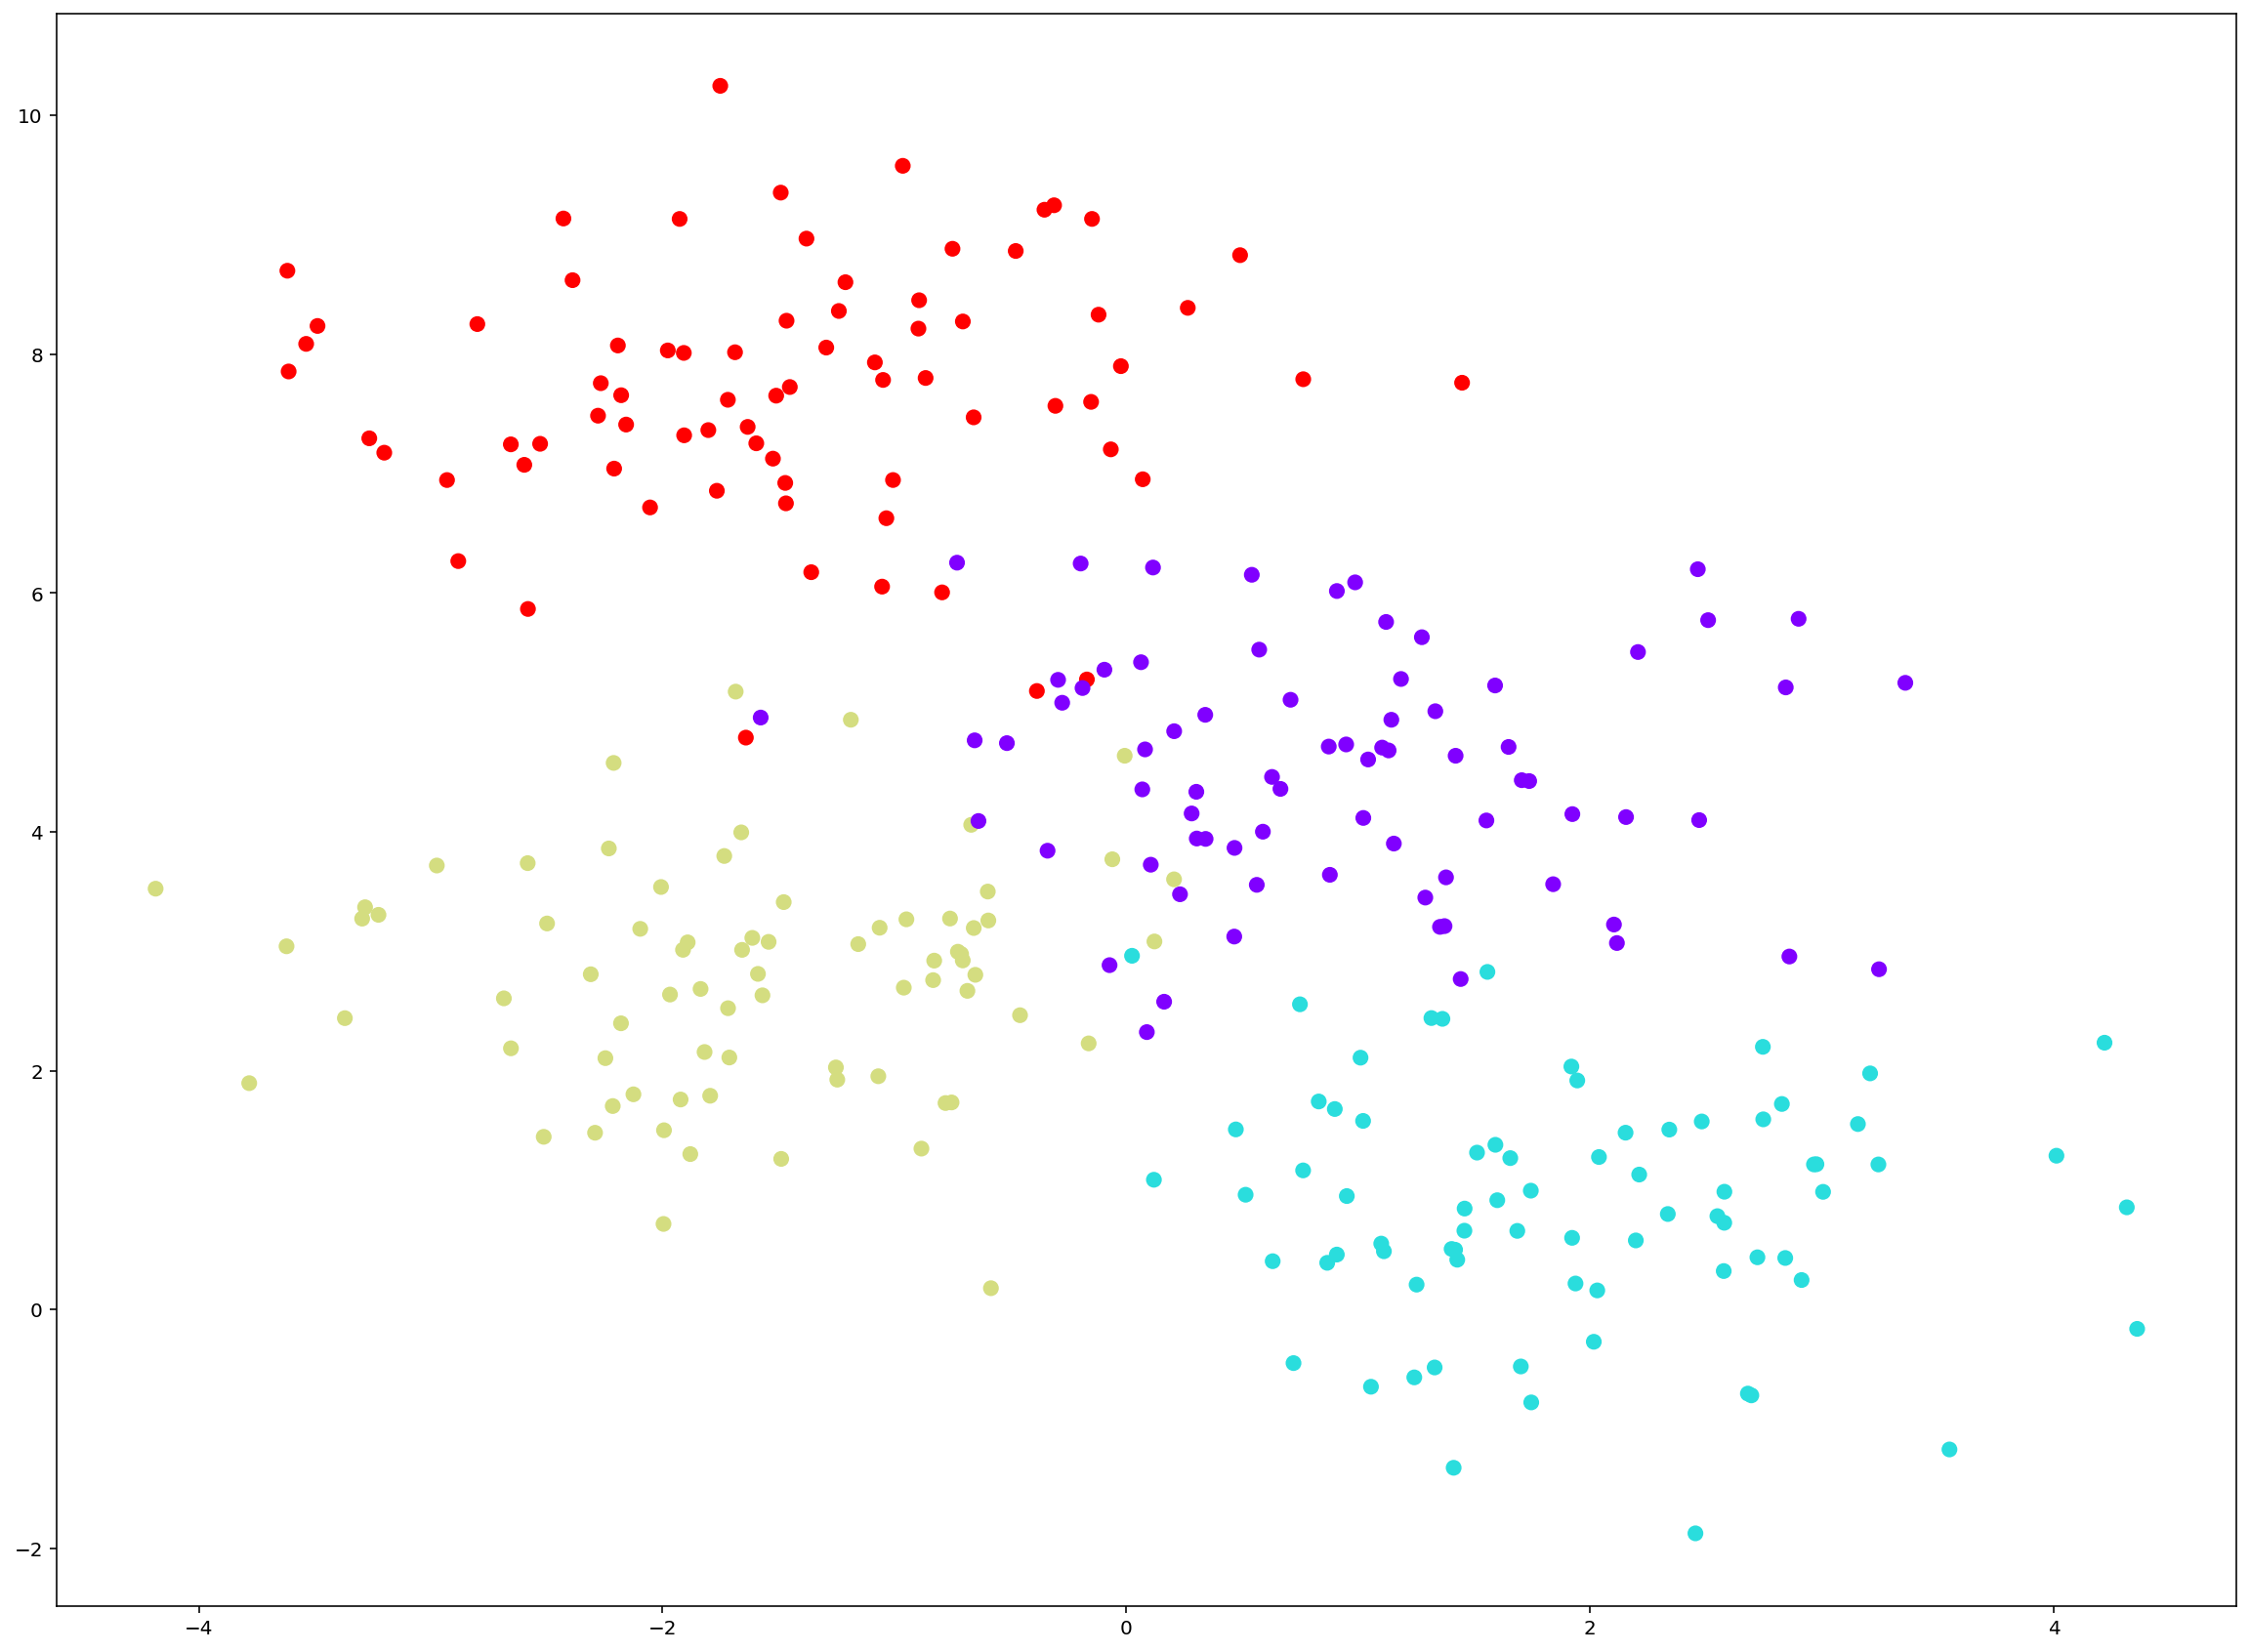

In [15]:
# Generate data and plot them
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(20,15))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

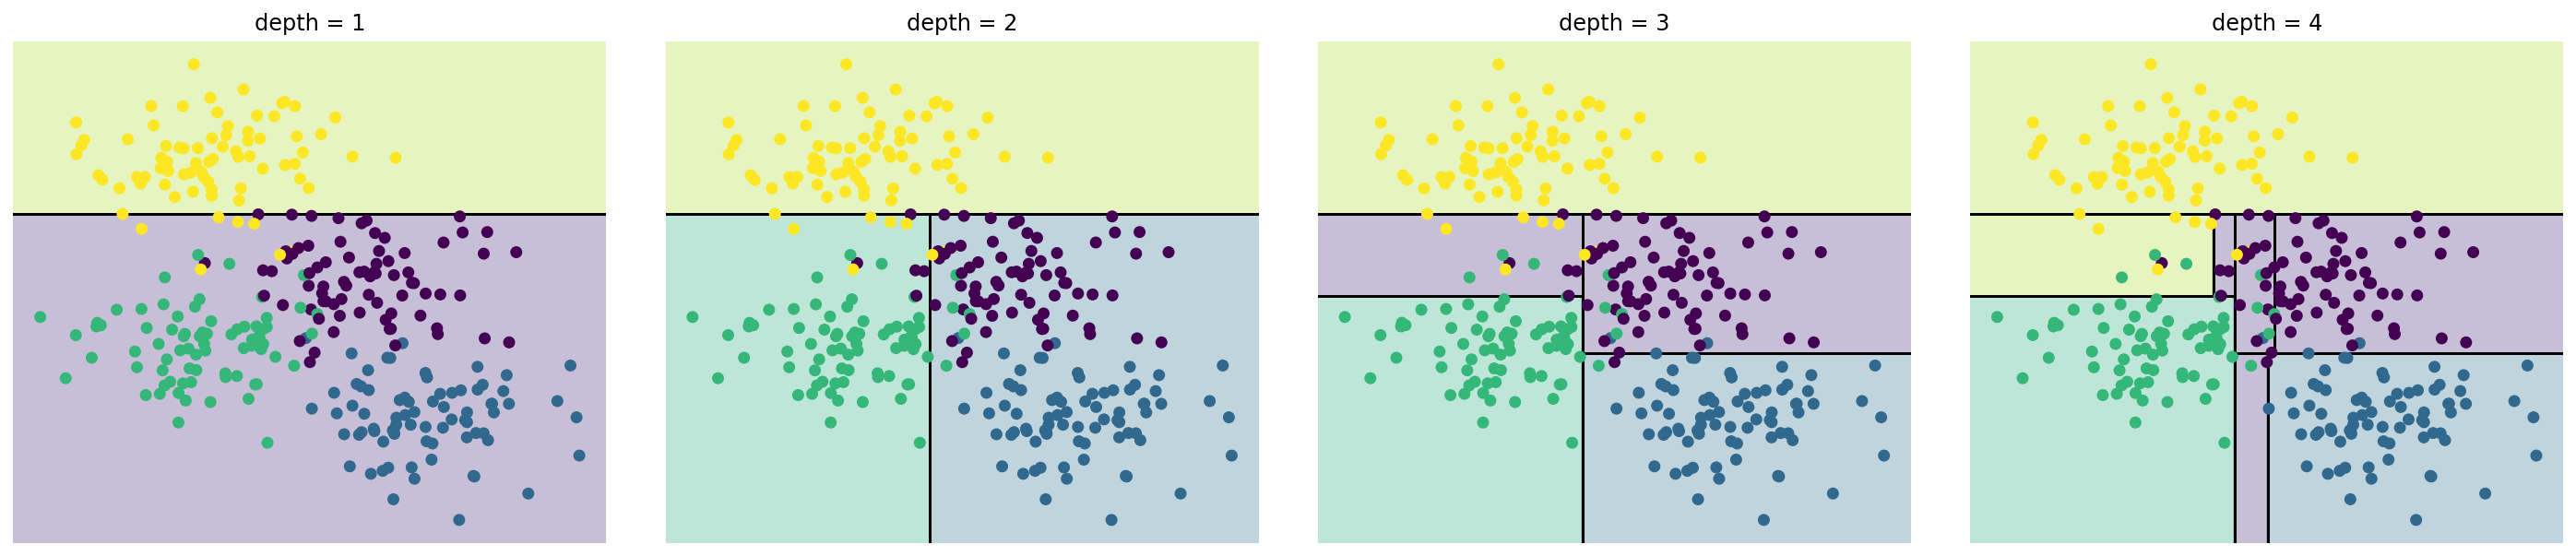

In [17]:
# Plot model splitting
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#### Visualise classifier output

Let's write an utility function to help us visualize the output of the classifier.

In [18]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now, we can call the function on our classifier.

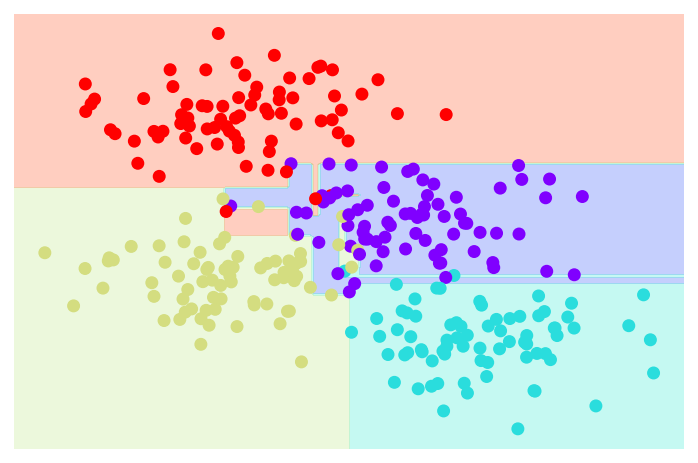

In [19]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [20]:
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

#### Overfit

We make the knowledge of the nemesis of any data scientist: _overfitting_.

Overfitting is called the phenomenon when the model learns too much out of training set, losing the ability to generalised to new data.

<p align="center">
    <img src="https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480">
</p>

we will explore such behaviours in detail in a moment. 

For now you can also rephrase it as the model fails to _learn_ while tends to _remember_.

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data.

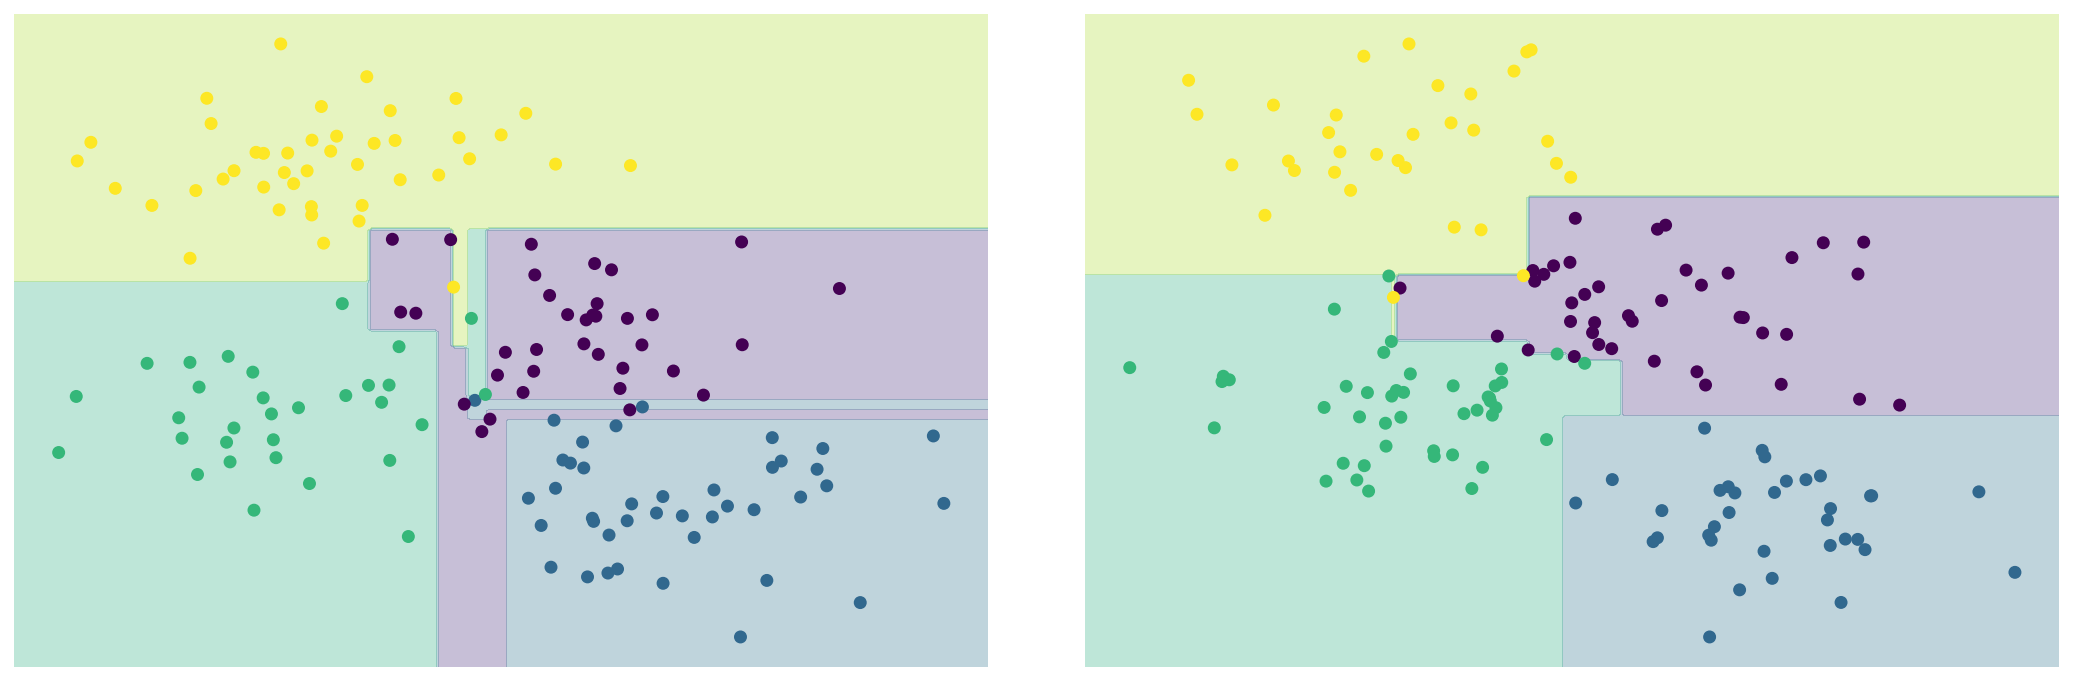

In [21]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result!

In [22]:
randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

This is indeed the case, we will see some so-called _ensemble techniques_ later in the course of lectures.

---

#### Exercise

Try to classify hand-written digits data with the corresponding labels.

In [23]:
digits = load_digits()

We loaded the dataset, let's print some of the data.

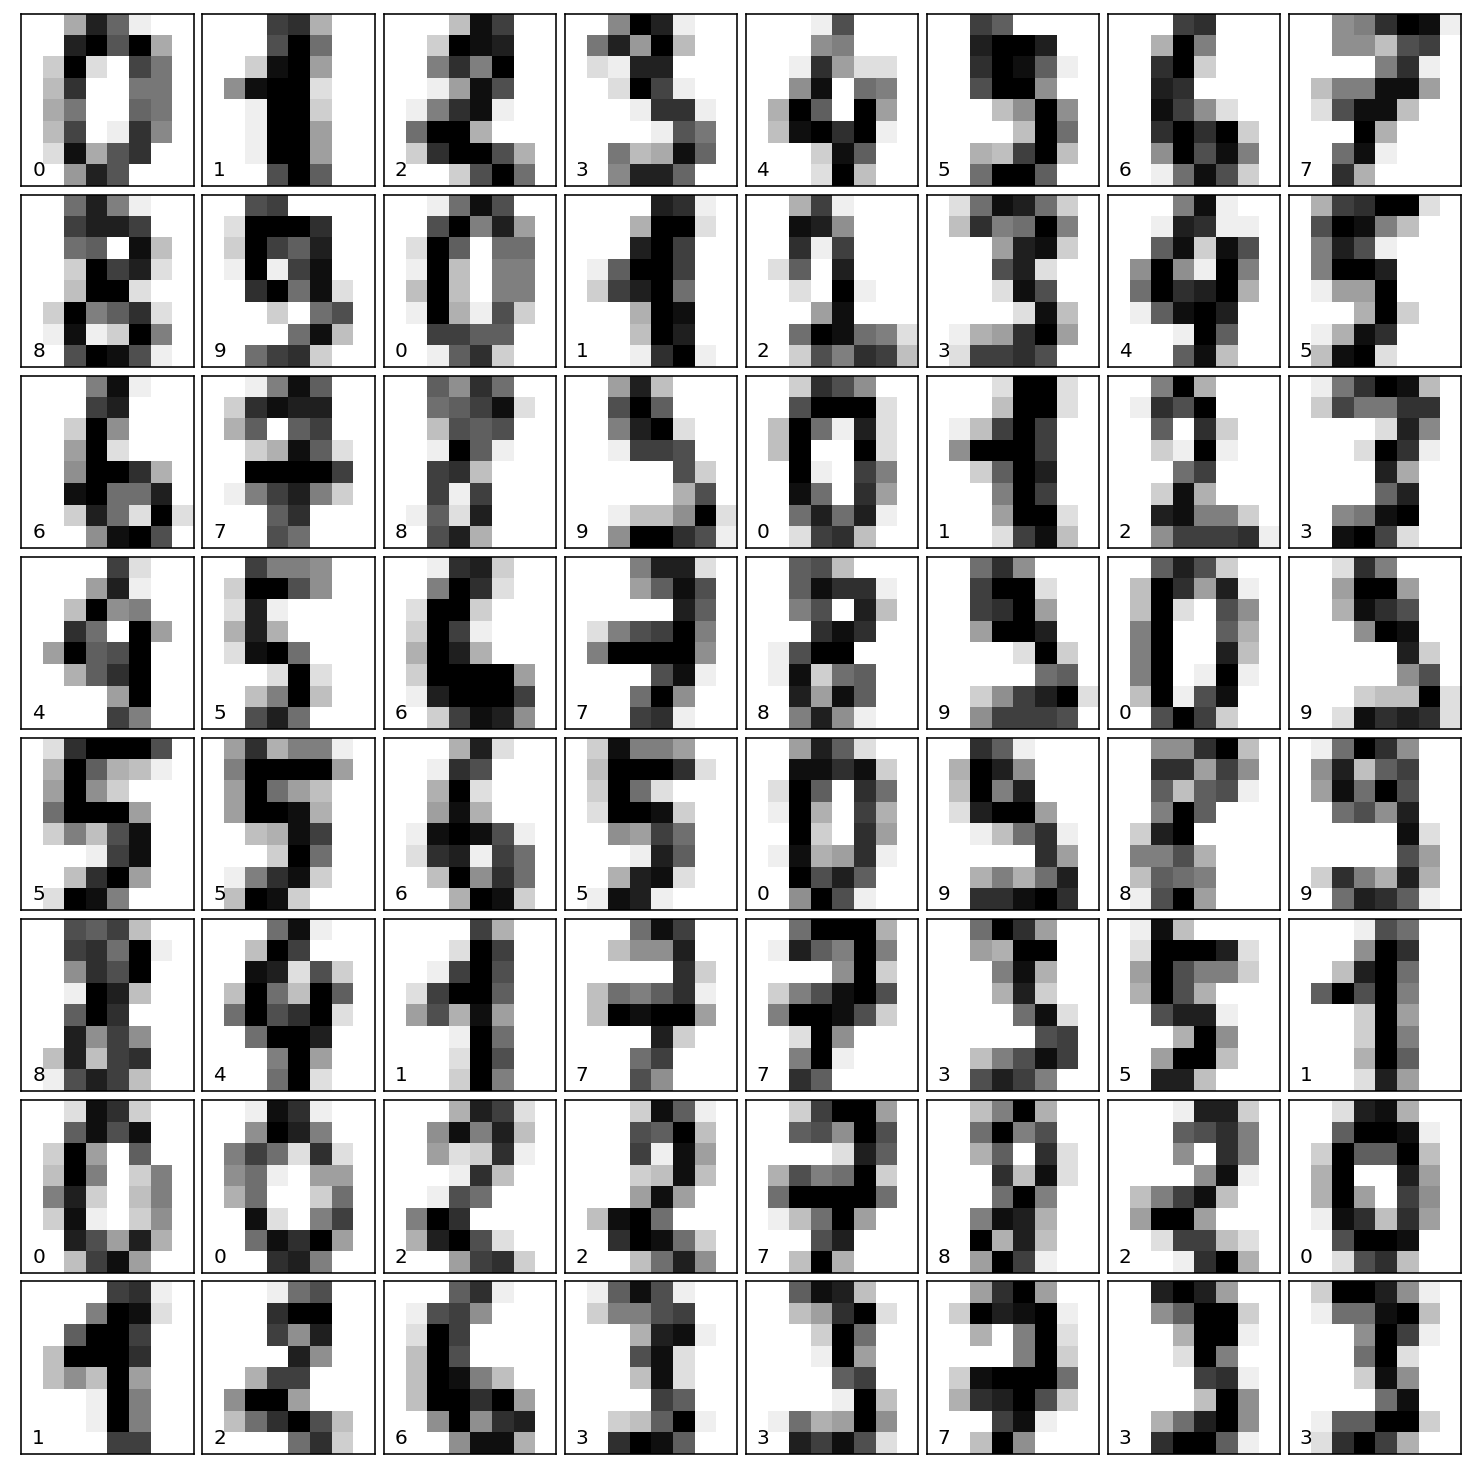

In [24]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can see images as $8\times 8$ matrices, and in the bottom left corner we have the corresponding label.

You task is to classify handwritten digits with a Decision Tree classifier.